In [2]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [1]:
import os
import cv2

data_dir = r"G:\leapGestRecog"
images = []
labels = []

for outer_folder in sorted(os.listdir(data_dir)):
    outer_path = os.path.join(data_dir, outer_folder)
    if os.path.isdir(outer_path):
        for gesture_folder in os.listdir(outer_path):
            gesture_path = os.path.join(outer_path, gesture_folder)
            if os.path.isdir(gesture_path):
                label_name = gesture_folder  # E.g. 01_palm
                for file_name in os.listdir(gesture_path):
                    if file_name.lower().endswith(('.png', '.jpg', '.jpeg')):
                        file_path = os.path.join(gesture_path, file_name)
                        img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
                        if img is not None:
                            img = cv2.resize(img, (64, 64))
                            images.append(img)
                            labels.append(label_name)
                        else:
                            print(f"❌ Could not read: {file_path}")
                    else:
                        print(f"⚠️ Skipped (not image): {file_name}")

print("✅ Loaded", len(images), "images with", len(set(labels)), "gesture labels.")


⚠️ Skipped (not image): 01_palm
⚠️ Skipped (not image): 02_l
⚠️ Skipped (not image): 03_fist
⚠️ Skipped (not image): 04_fist_moved
⚠️ Skipped (not image): 05_thumb
⚠️ Skipped (not image): 06_index
⚠️ Skipped (not image): 07_ok
⚠️ Skipped (not image): 08_palm_moved
⚠️ Skipped (not image): 09_c
⚠️ Skipped (not image): 10_down
⚠️ Skipped (not image): 01_palm
⚠️ Skipped (not image): 02_l
⚠️ Skipped (not image): 03_fist
⚠️ Skipped (not image): 04_fist_moved
⚠️ Skipped (not image): 05_thumb
⚠️ Skipped (not image): 06_index
⚠️ Skipped (not image): 07_ok
⚠️ Skipped (not image): 08_palm_moved
⚠️ Skipped (not image): 09_c
⚠️ Skipped (not image): 10_down
⚠️ Skipped (not image): 01_palm
⚠️ Skipped (not image): 02_l
⚠️ Skipped (not image): 03_fist
⚠️ Skipped (not image): 04_fist_moved
⚠️ Skipped (not image): 05_thumb
⚠️ Skipped (not image): 06_index
⚠️ Skipped (not image): 07_ok
⚠️ Skipped (not image): 08_palm_moved
⚠️ Skipped (not image): 09_c
⚠️ Skipped (not image): 10_down
⚠️ Skipped (not image)

In [2]:
import numpy as np

X = np.array(images)
y = np.array(labels)

print("✅ Images:", X.shape)
print("✅ Labels:", y.shape)
print("🗂️ Labels example:", np.unique(y))


✅ Images: (20000, 64, 64)
✅ Labels: (20000,)
🗂️ Labels example: ['01_palm' '02_l' '03_fist' '04_fist_moved' '05_thumb' '06_index' '07_ok'
 '08_palm_moved' '09_c' '10_down']


In [3]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# 🔢 Encode string labels -> integers
le = LabelEncoder()
y_encoded = le.fit_transform(y)

print("Encoded labels:", np.unique(y_encoded))  # Should be 0 to 9

# 🧩 One-hot encode for training
y_onehot = to_categorical(y_encoded)

print("One-hot shape:", y_onehot.shape)


G:\machine_notebooks\envs\gesture_env\lib\site-packages\requests\__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(


Encoded labels: [0 1 2 3 4 5 6 7 8 9]
One-hot shape: (20000, 10)


In [4]:
from sklearn.model_selection import train_test_split

# Add channel dimension for grayscale images: (64, 64) → (64, 64, 1)
X = X.reshape(-1, 64, 64, 1)

# Normalize pixel values to [0, 1]
X = X / 255.0

# Split: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y_onehot, test_size=0.2, random_state=42, stratify=y_encoded
)

print("Train:", X_train.shape, y_train.shape)
print("Test :", X_test.shape, y_test.shape)


Train: (16000, 64, 64, 1) (16000, 10)
Test : (4000, 64, 64, 1) (4000, 10)


In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')  # 10 gesture classes
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


G:\machine_notebooks\envs\gesture_env\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       589,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 683,914 (2.61 MB)

 Trainable params: 683,914 (2.61 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
history = model.fit(
    X_train, y_train,
    epochs=10,           # Increase epochs later if needed
    batch_size=32,
    validation_data=(X_test, y_test)
)


Epoch 1/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 43s 76ms/step - accuracy: 0.6608 - loss: 0.9777 - val_accuracy: 0.9955 - val_loss: 0.0157
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 38s 76ms/step - accuracy: 0.9786 - loss: 0.0625 - val_accuracy: 0.9950 - val_loss: 0.0166
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 38s 75ms/step - accuracy: 0.9874 - loss: 0.0426 - val_accuracy: 0.9985 - val_loss: 0.0048
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 38s 76ms/step - accuracy: 0.9922 - loss: 0.0206 - val_accuracy: 0.9998 - val_loss: 7.7058e-04
Epoch 5/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 38s 76ms/step - accuracy: 0.9960 - loss: 0.0140 - val_accuracy: 1.0000 - val_loss: 2.5278e-04
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 37s 75ms/step - accuracy: 0.9955 - loss: 0.0174 - val_accuracy: 0.9992 - val_loss: 0.0030
Epoch 7/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 38s 75ms/step - accuracy: 0.9952 - loss: 0.0162 - val_accuracy: 0.9995 - val_loss: 9.7907e-04
Epoch 8/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 37s 75ms/step - accuracy: 0.9967 - los

In [8]:
!pip install matplotlib


   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   --------- ------------------------------ 1.8/8.1 MB 11.2 MB/s eta 0:00:01
   --------------------------------- ------ 6.8/8.1 MB 22.1 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 15.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   ---------------------------------------- 2.3/2.3 MB 25.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/7.0 MB ? eta -:--:--
   --------- ------------------------------ 1.6/7.0 MB 42.3 MB/s eta 0:00:01
   ---------------- ----------------------- 2.9/7.0 MB 6.7 MB/s eta 0:00:01
   ------------------------- -------------- 4.5/7.0 MB 7.7 MB/s eta 0:00:01
   ------------------------------------ --- 6.3/7.0 MB 7.2 MB/s eta 0:00:01
   ---------------------------------------- 7.0/7.0 MB 6.3 MB/s eta 0:00:00

   ---------------------------------------- 0/7 [pyparsing]
   ----------------------------------------

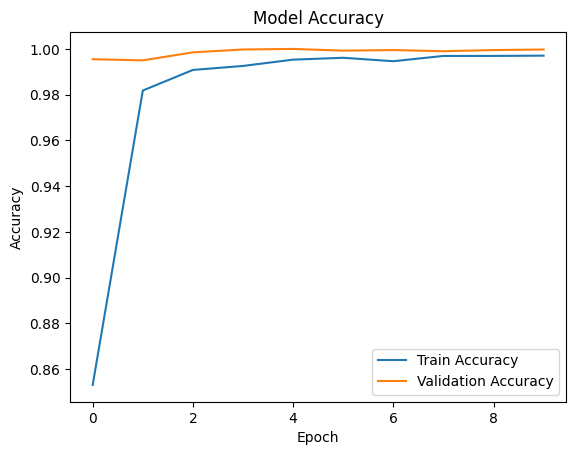

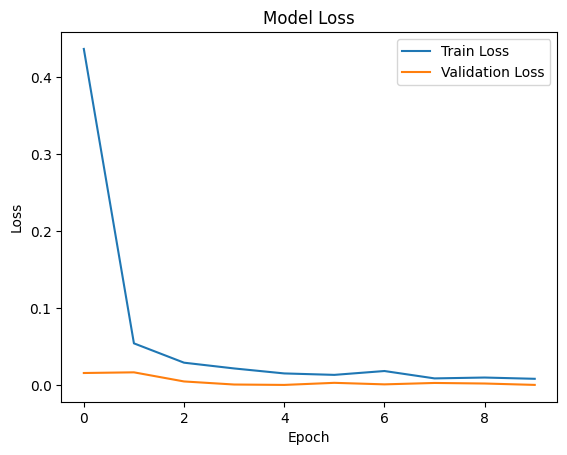

In [9]:
import matplotlib.pyplot as plt

# Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


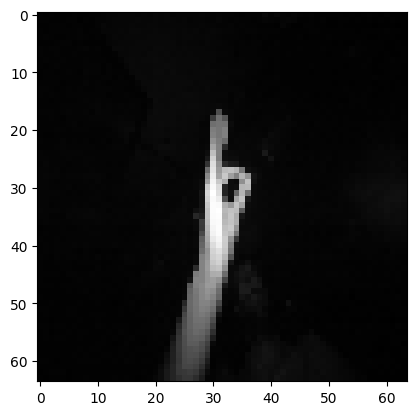

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step
Predicted: 6
Actual: 6


In [10]:
import cv2
import numpy as np

# Example: load one test image and predict
index = 0  # pick any test image index
sample = X_test[index]
plt.imshow(sample.reshape(64, 64), cmap='gray')
plt.show()

# Predict
prediction = model.predict(sample.reshape(1, 64, 64, 1))
print("Predicted:", np.argmax(prediction))
print("Actual:", np.argmax(y_test[index]))
